In [1]:
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('D:\\train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


## 1- Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

There isn't any null value.

In [5]:
df.drop_duplicates(inplace=True)
df.shape

(2000, 21)

In [6]:
for column in df.columns:
    if not df[column].isin([0, 1]).all():
        upper_bound = df[column].mean() + 3 * df[column].std()
        lower_bound = df[column].mean() - 3 * df[column].std()

        indexes = df[(df[column] > upper_bound) | (df[column] < lower_bound)].index
        df.drop(indexes, inplace=True)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


## 2- Feature analyzing and data visualization

In [7]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.00000,1988.000000
mean,1237.593058,0.495473,1.522133,0.509054,4.226358,0.520624,32.089034,0.502012,140.159457,4.524145,9.858149,643.926559,1251.535714,2126.544266,12.308350,5.771630,11.014588,0.760563,0.502515,0.50503,1.501509
std,439.498835,0.500105,0.816811,0.500044,4.220051,0.499700,18.128175,0.288438,35.361078,2.289980,6.035626,442.961039,432.086772,1084.186322,4.215626,4.361399,5.459398,0.426847,0.500119,0.50010,1.118314
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000
25%,851.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.000000,874.750000,1210.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.00000,1.000000
50%,1225.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.00000,2.000000
75%,1615.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,945.250000,1632.250000,3066.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.00000,3.000000
max,1998.000000,1.000000,3.000000,1.000000,17.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.00000,3.000000


<AxesSubplot:>

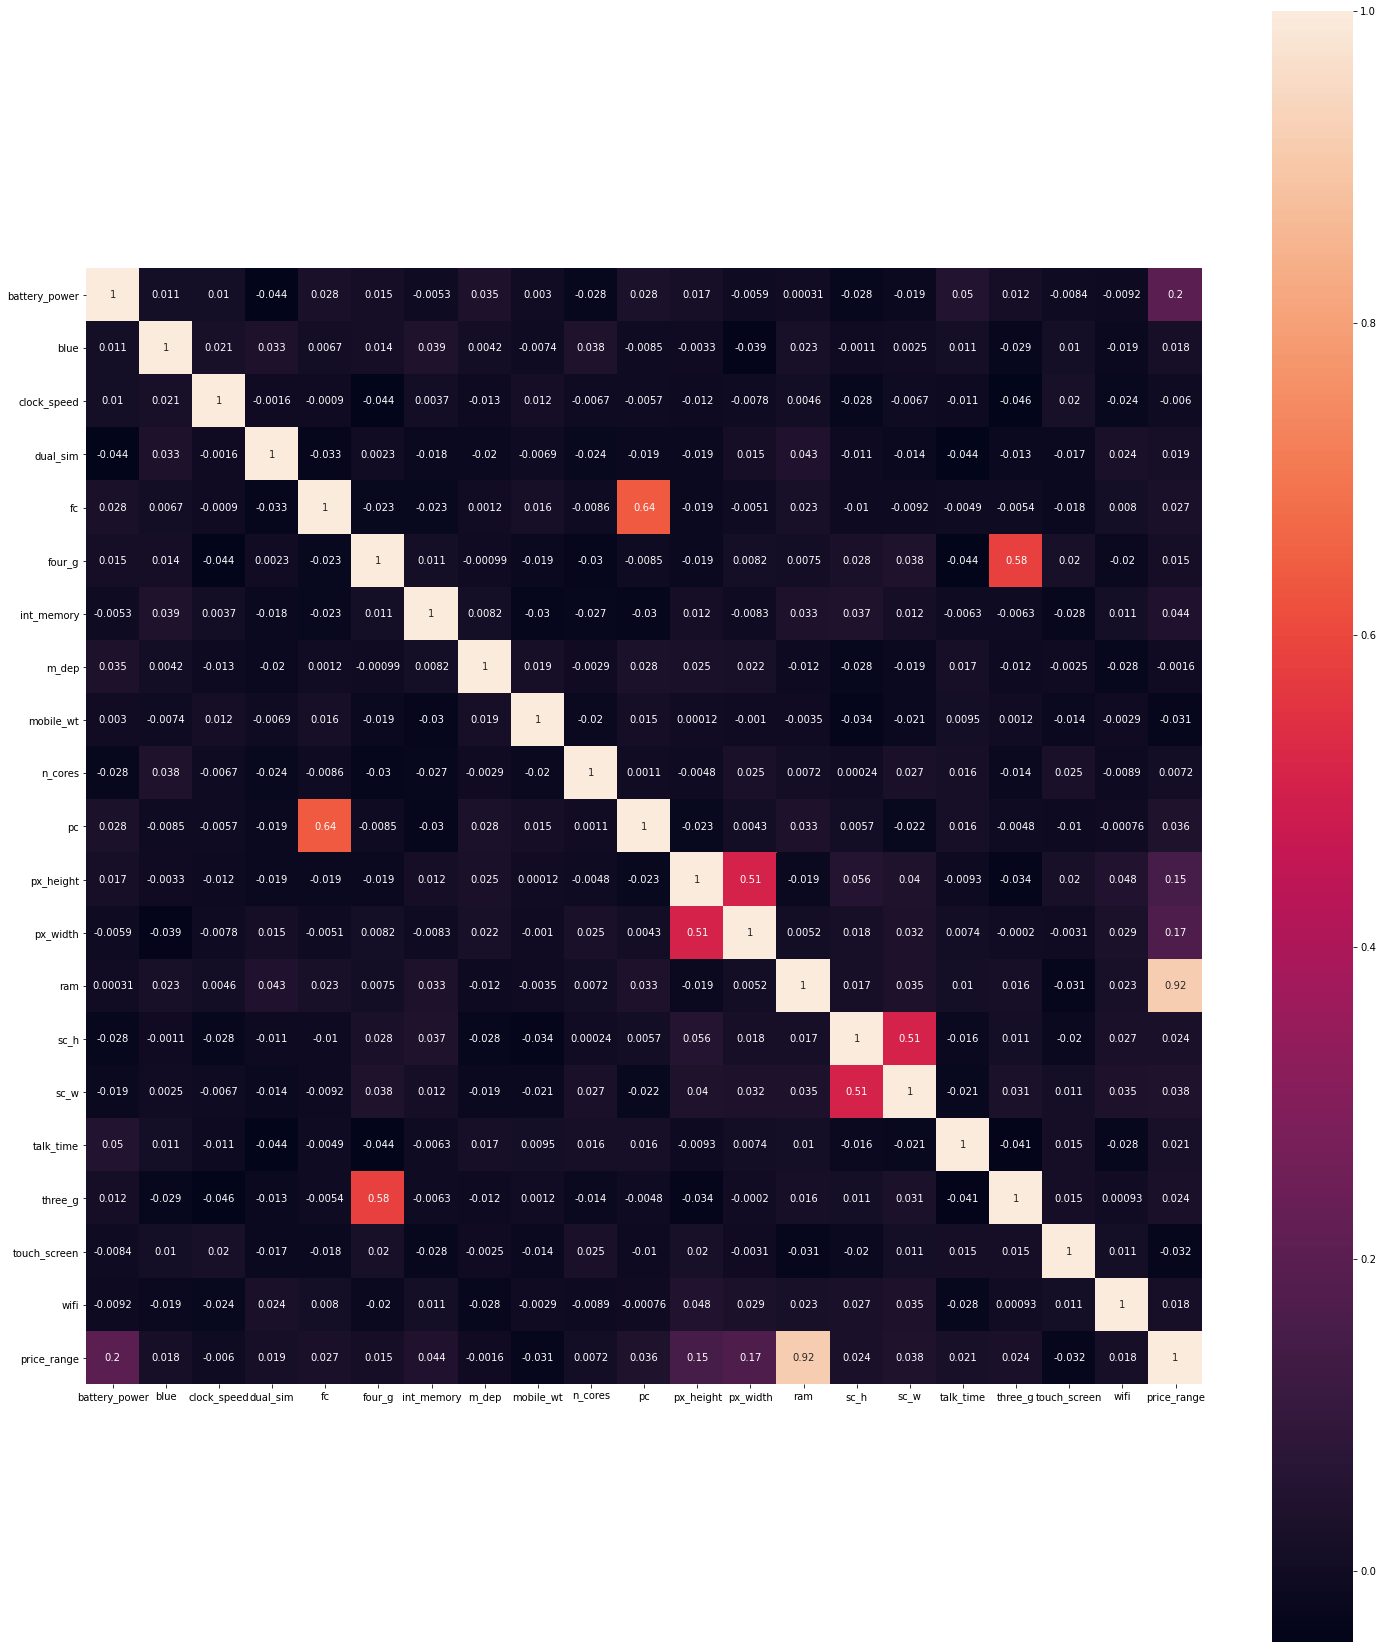

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(25, 30))
sns.heatmap(df.corr(), square=True, annot=True)

<AxesSubplot:xlabel='ram', ylabel='battery_power'>

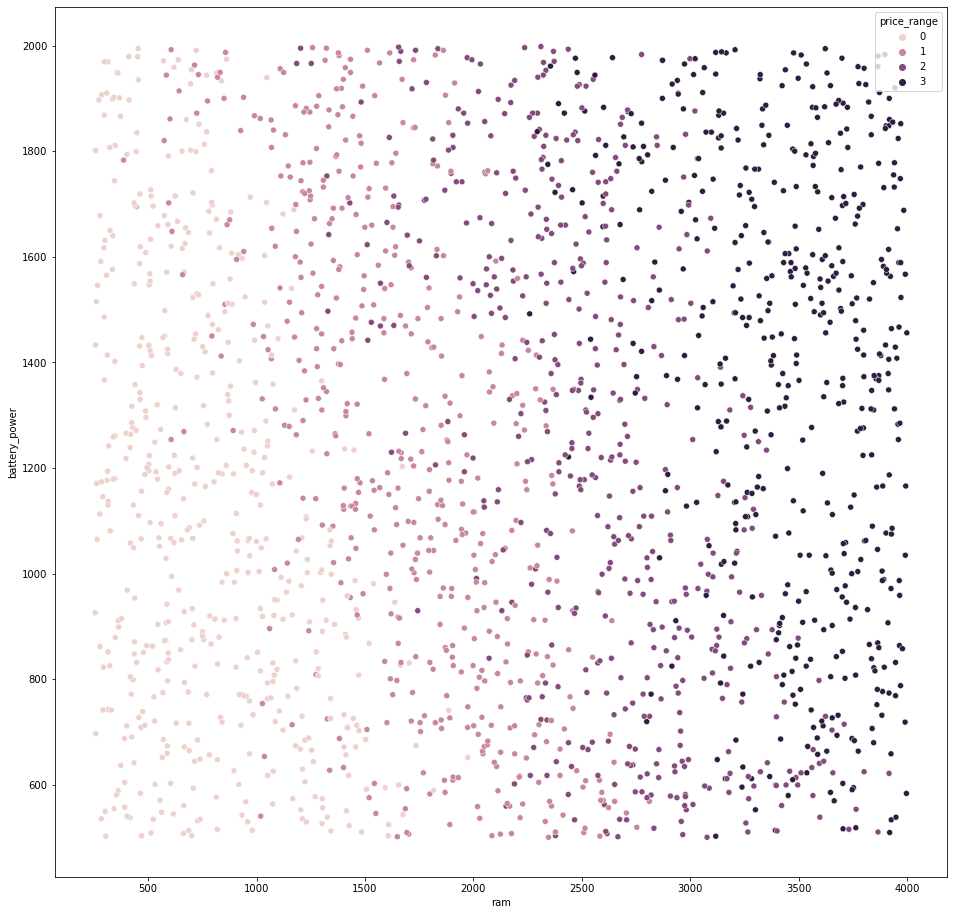

In [9]:
plt.figure(figsize=(16, 16))
sns.scatterplot(data = df, x = df['ram'], y = 'battery_power', hue='price_range')

<AxesSubplot:xlabel='pc', ylabel='fc'>

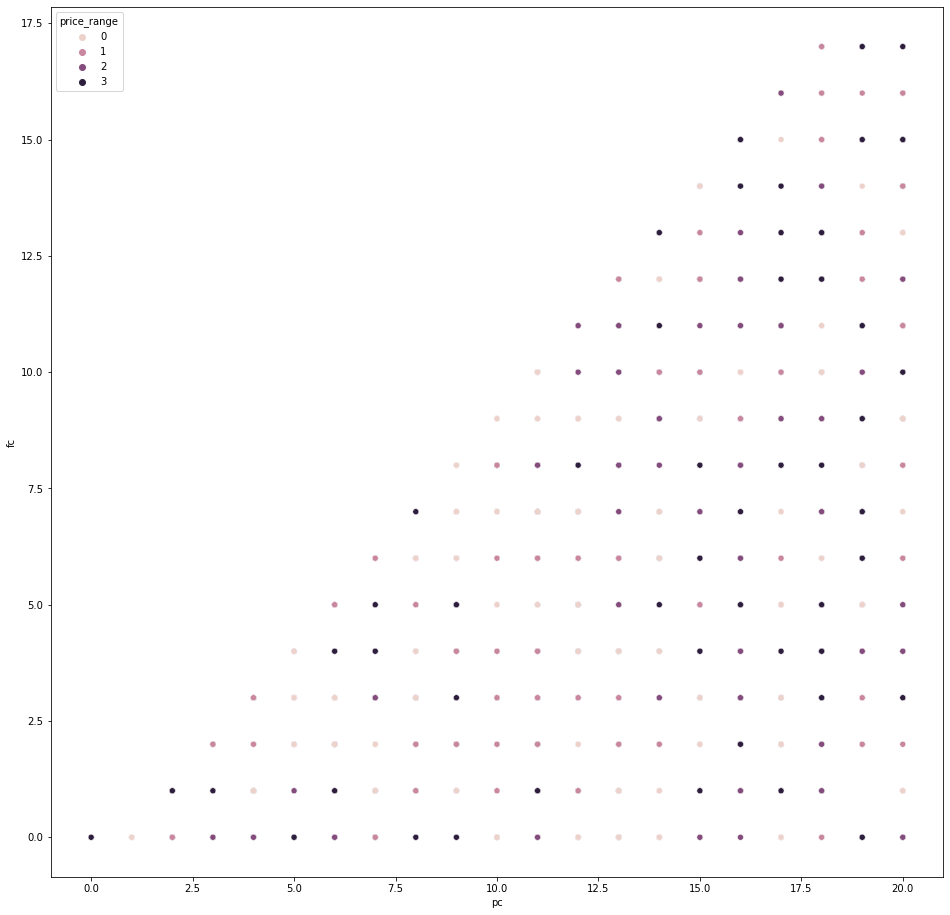

In [10]:
plt.figure(figsize=(16, 16))
sns.scatterplot(data = df, x = df['pc'], y = 'fc', hue='price_range')

<AxesSubplot:xlabel='px_height', ylabel='px_width'>

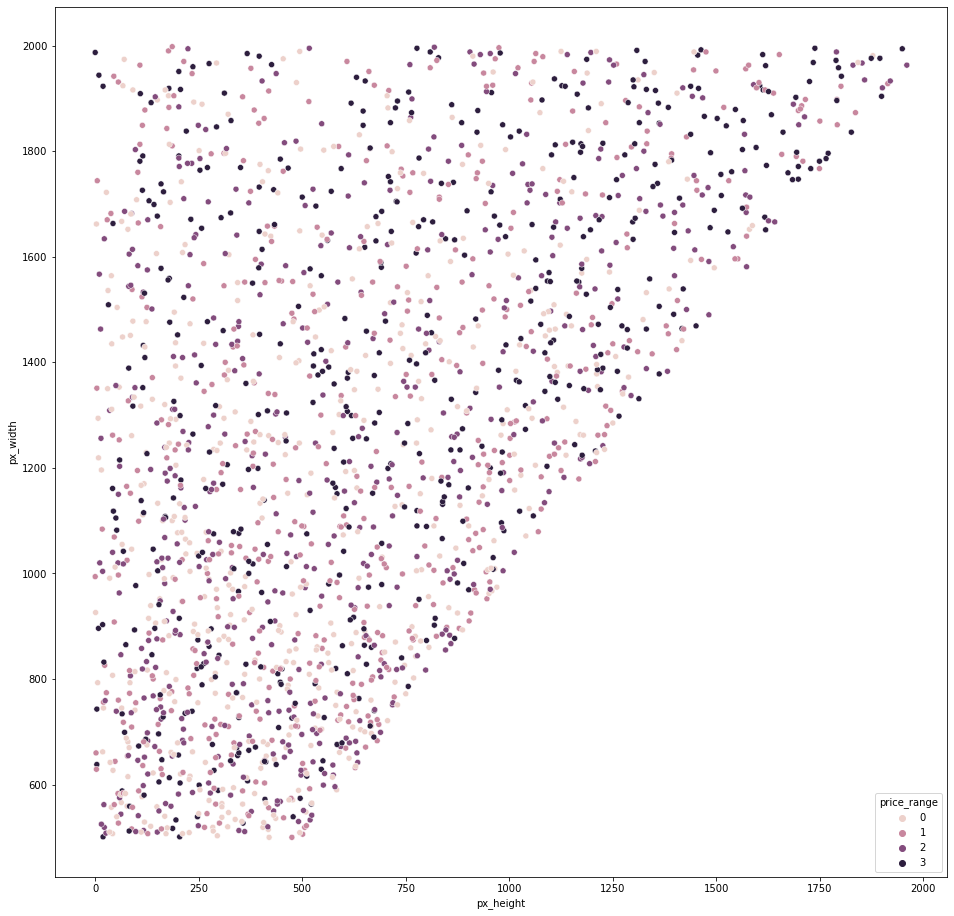

In [11]:
plt.figure(figsize=(16, 16))
sns.scatterplot(data = df, x = df['px_height'], y = 'px_width', hue='price_range')

In [12]:
def feat_plot(feature):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name} histogram plot')
    
    plt.subplot(1, 3, 2)
    mu, sigma = stats.norm.fit(feature)
    sns.distplot(feature)
    plt.axvline(mu, linestyle = '--', color = 'green')
    plt.axvline(sigma, linestyle = '--', color = 'red')
    plt.title(f'{feature.name} distribution plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    plt.show()

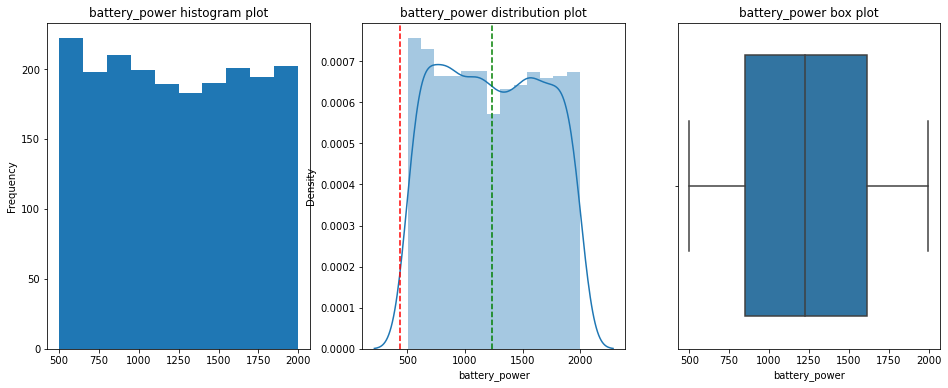

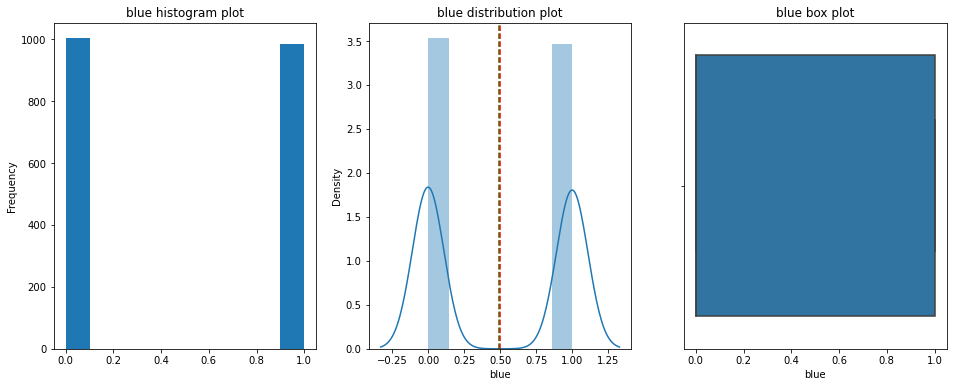

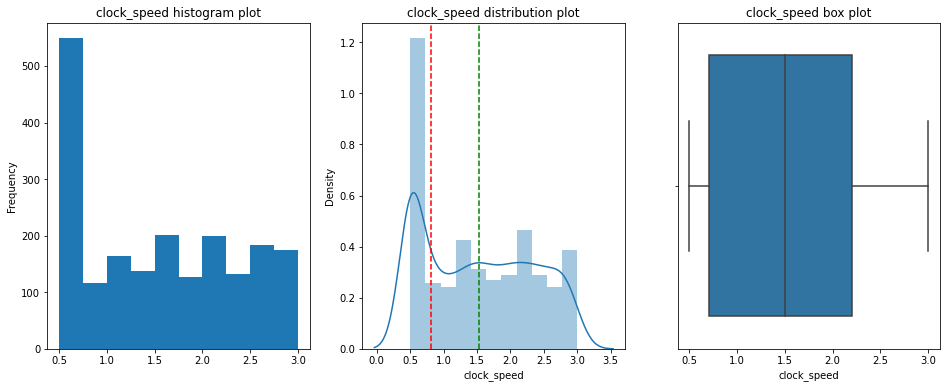

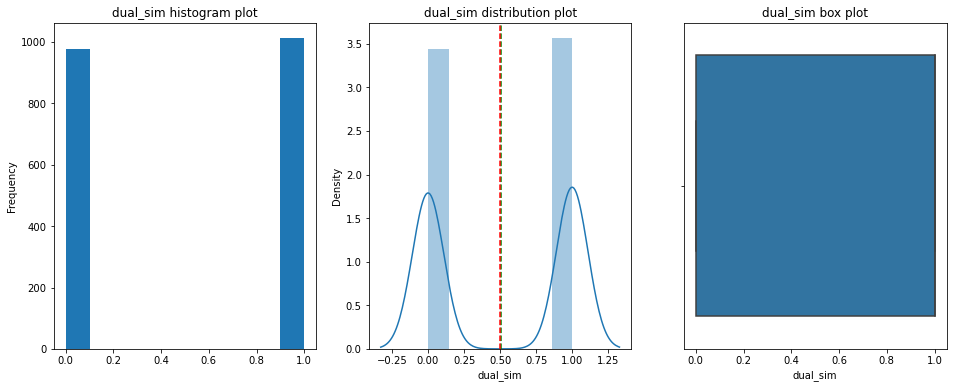

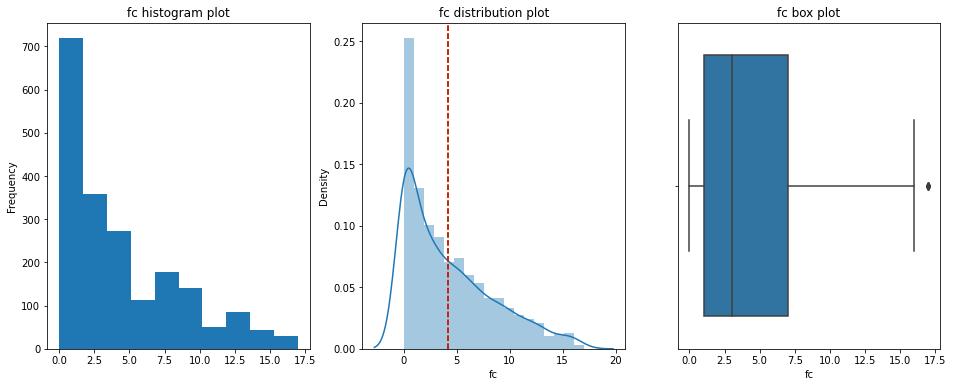

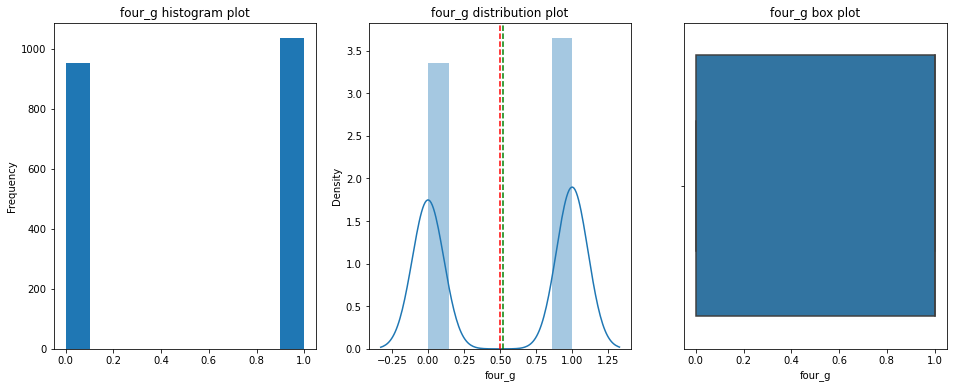

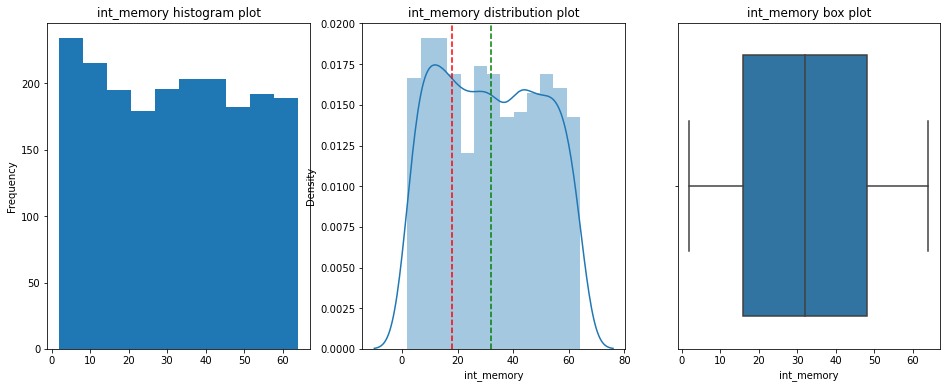

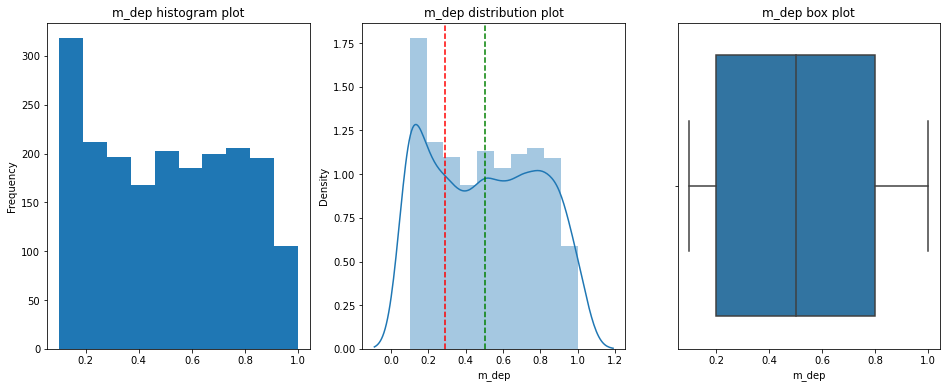

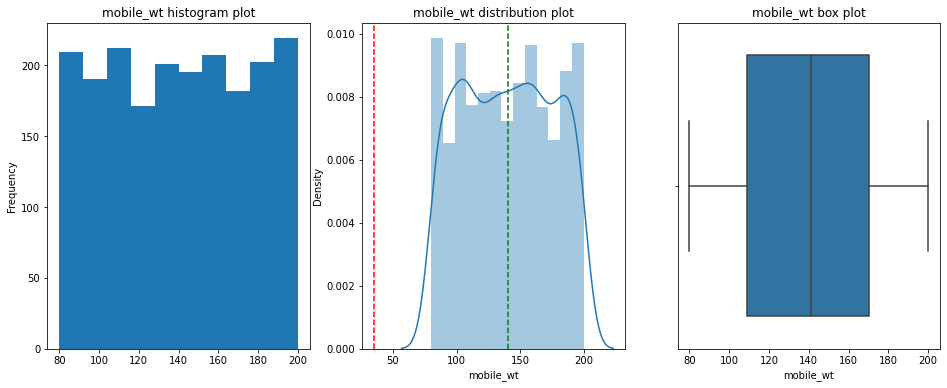

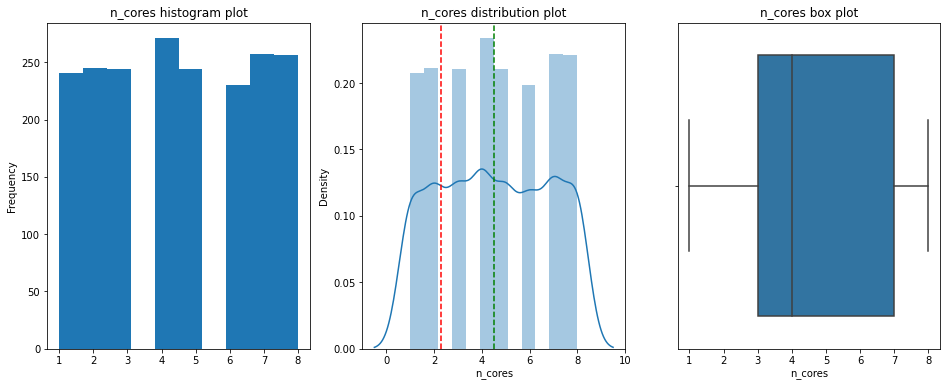

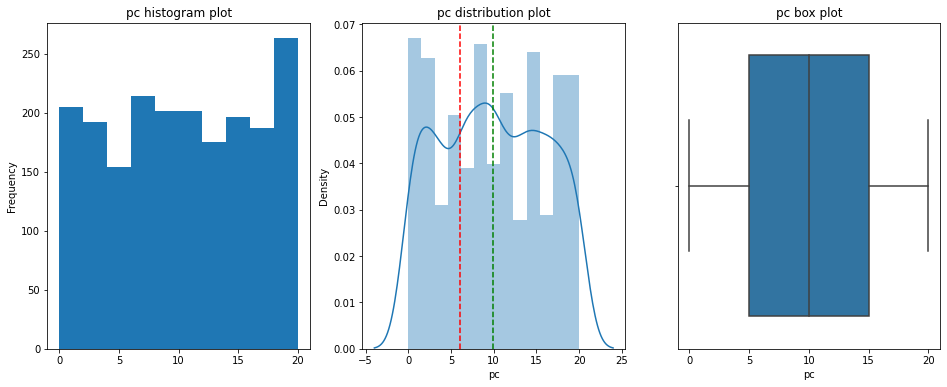

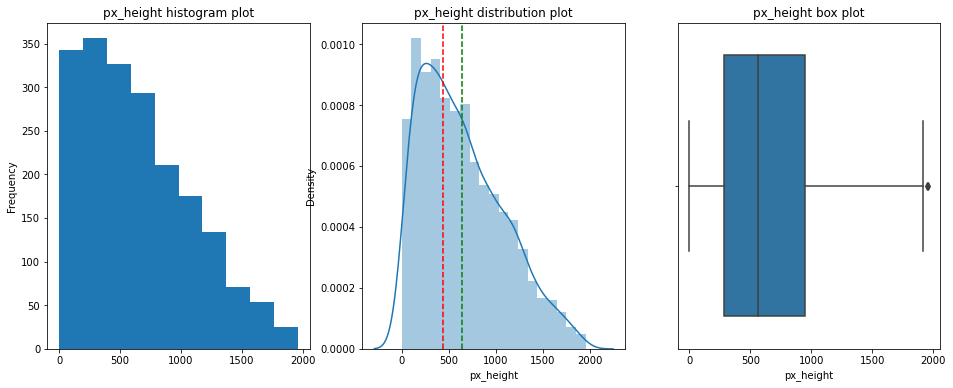

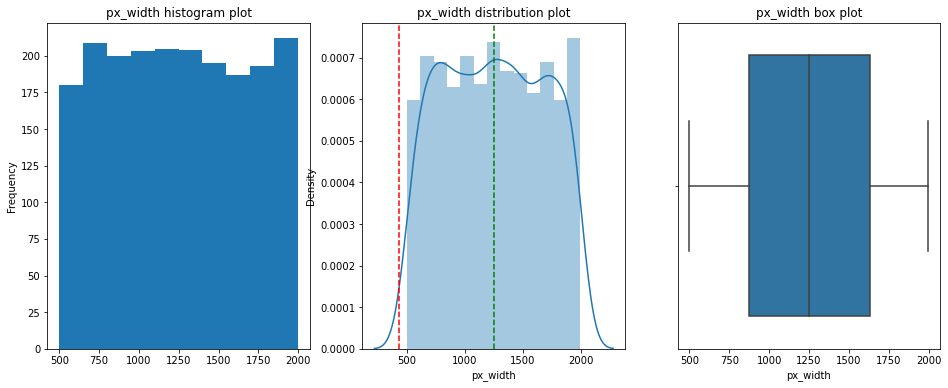

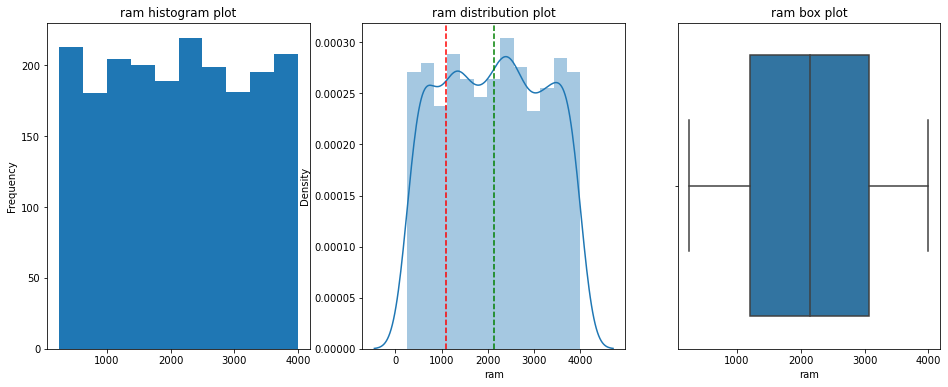

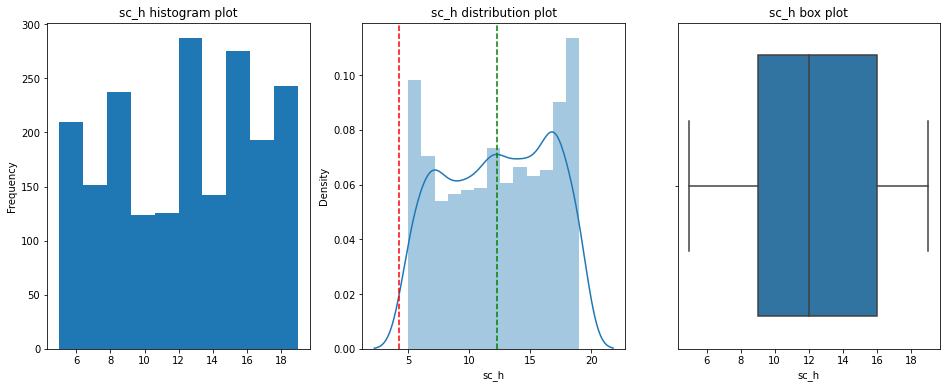

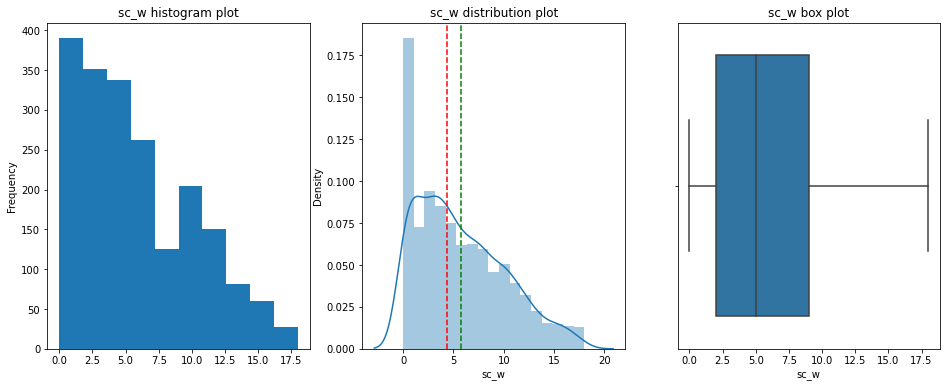

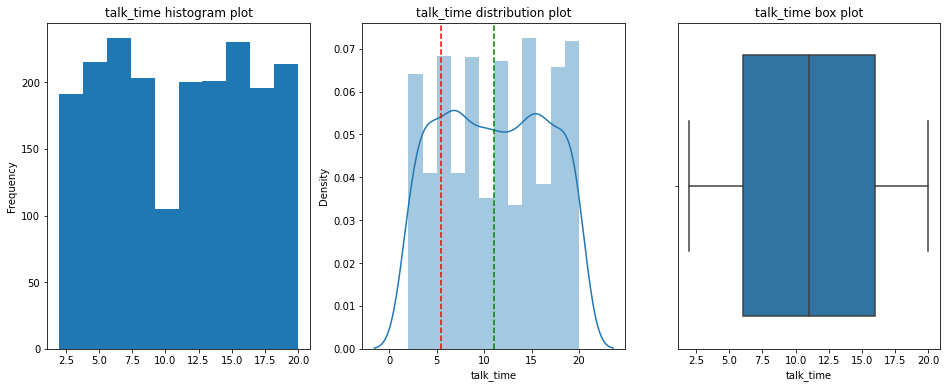

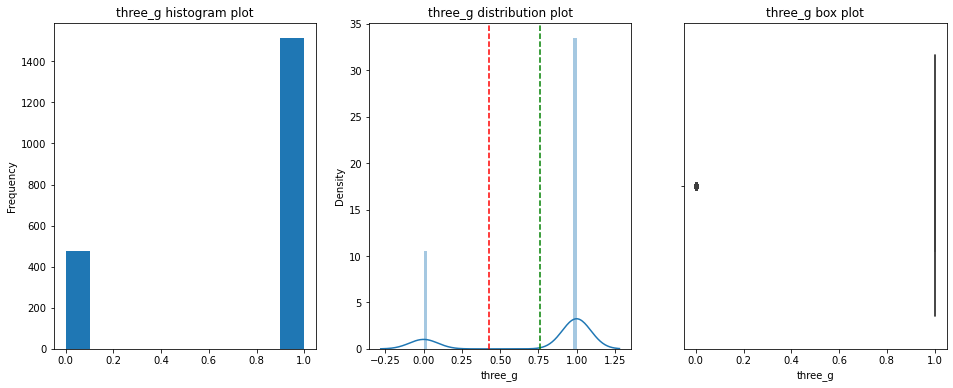

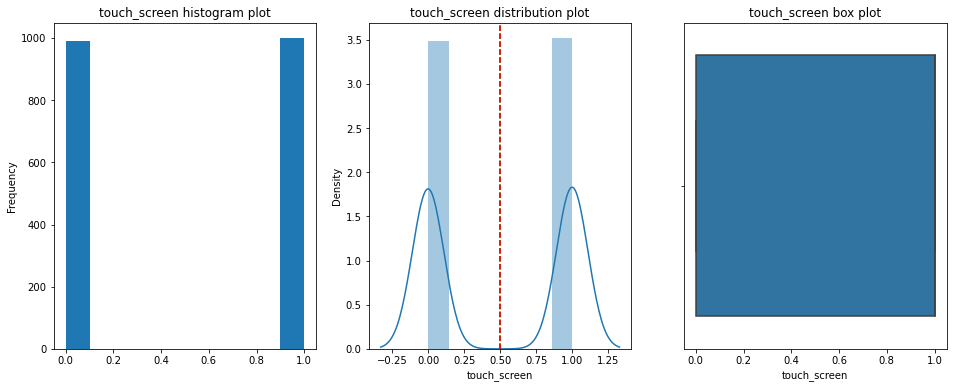

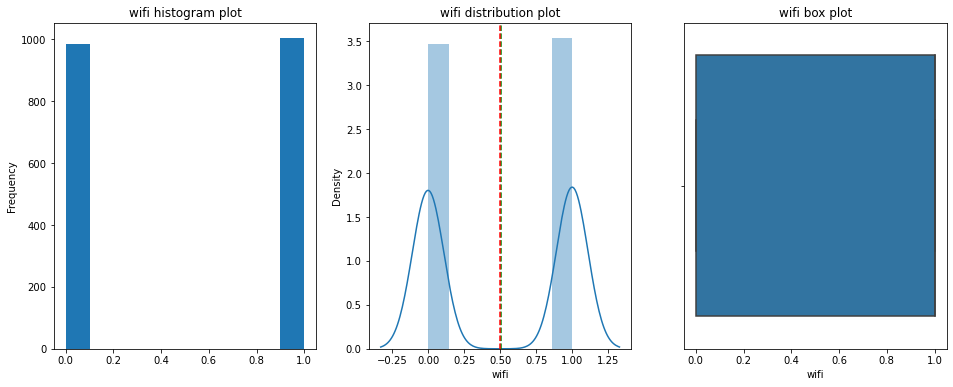

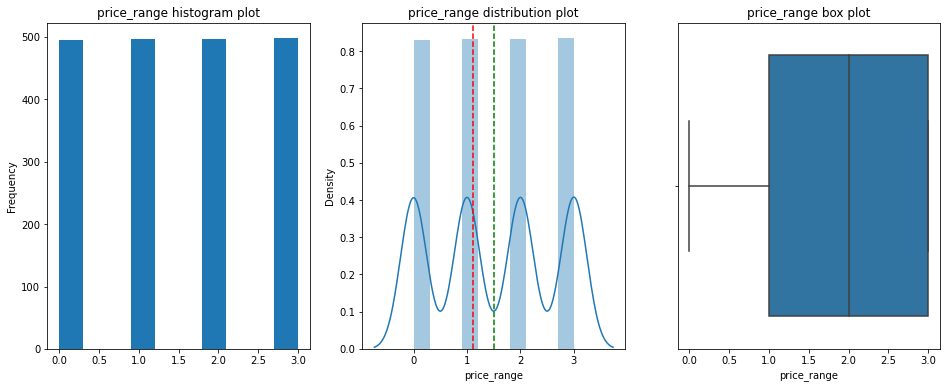

In [13]:
num_feat = df.select_dtypes(exclude = 'object')
for i in num_feat.columns:
    feat_plot(num_feat[i])

## 3- Hypothesis tests

### 3-1- Mean of bluetooth is 1

In [14]:
tstat, p_value = stats.ttest_1samp(df['blue'], popmean = 1)
print('t stat : {} \np_value : {}'.format(tstat,p_value))
if p_value < 0.05:
    print("null hypothesis is not true!")
else:
    print("null hypothesis is true!")

t stat : -44.9812256380201 
p_value : 2.531345654727892e-305
null hypothesis is not true!


### 3-2- 3G and 4G are dependant

In [15]:
sstat, p_value = stats.spearmanr(df["three_g"], df["four_g"])
print('t stat : {}\np_value : {}'.format(tstat,p_value))
if p_value >= 0.05:
    print("null hypothesis is not true!")
else:
    print("null hypothesis is true!")

t stat : -44.9812256380201
p_value : 1.11573694359972e-182
null hypothesis is true!


### 3-3- Battery power effects on price range

In [16]:
fstat,p_value = stats.pearsonr(df["battery_power"],df["price_range"])

print('f stat : {}\np_value : {}'.format(fstat,p_value))
if p_value > 0.05:
    print("null hypothesis is not true!")
else:
    print("null hypothesis is true!")

f stat : 0.2017678439943646
p_value : 1.0451771440707658e-19
null hypothesis is true!


### 3-4- Ram and n_cores are dependant

In [17]:
stat, pval = stats.kendalltau(df['ram'], df['n_cores'])
print('stat=%.3f, pval=%.3f' % (stat, pval))
if pval > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.005, pval=0.733
Probably independent


### 3-5- Wifi and bluetooth are the same distribution

In [18]:
stat, pval = stats.ttest_ind(df['wifi'], df['blue'])
print('stat=%.3f, p=%.3f' % (stat, pval))
if pval > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.603, p=0.547
Probably the same distribution


## 4- Classification

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [20]:
x = df.drop('price_range', axis=1)
y = df['price_range']

print('Shape of X = ', x.shape)
print('Shape of y = ', y.shape)

Shape of X =  (1988, 20)
Shape of y =  (1988,)


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1590, 20) (398, 20) (1590,) (398,)


In [22]:
model1 = LogisticRegression(solver='lbfgs', penalty='l2')
model1.fit(x_train, y_train)

LogisticRegression()

In [23]:
y_pred_1 = model1.predict(x_test)

In [24]:
model2 = LogisticRegression(solver='liblinear', penalty='l1')
model2.fit(x_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [25]:
y_pred_2 = model2.predict(x_test)

In [26]:
model3 = LogisticRegression(solver='newton-cg', penalty='l2', multi_class='multinomial')
model3.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [27]:
y_pred_3 = model3.predict(x_test)

## 5- Classification report using confusion matrix

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
def print_report(model_number, y_pred):
    print(classification_report(y_test, y_pred))
    print('----------------------------------------------------------')
    print(confusion_matrix(y_test, y_pred))
    print('\n', 'Classification report for model {}'.format(model_number))

In [30]:
print_report(1, y_pred_1)

              precision    recall  f1-score   support

           0       0.88      0.81      0.85       113
           1       0.54      0.55      0.55        94
           2       0.41      0.47      0.44        88
           3       0.71      0.68      0.69       103

    accuracy                           0.64       398
   macro avg       0.64      0.63      0.63       398
weighted avg       0.65      0.64      0.65       398

----------------------------------------------------------
[[92 20  1  0]
 [12 52 25  5]
 [ 0 23 41 24]
 [ 0  1 32 70]]

 Classification report for model 1


In [31]:
print_report(2, y_pred_2)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       113
           1       0.82      0.71      0.76        94
           2       0.76      0.75      0.75        88
           3       0.93      0.99      0.96       103

    accuracy                           0.87       398
   macro avg       0.86      0.86      0.86       398
weighted avg       0.87      0.87      0.87       398

----------------------------------------------------------
[[112   1   0   0]
 [  7  67  20   0]
 [  0  14  66   8]
 [  0   0   1 102]]

 Classification report for model 2


In [32]:
print_report(3, y_pred_3)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       113
           1       0.99      0.94      0.96        94
           2       0.95      0.95      0.95        88
           3       0.96      0.98      0.97       103

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398

----------------------------------------------------------
[[112   1   0   0]
 [  4  88   2   0]
 [  0   0  84   4]
 [  0   0   2 101]]

 Classification report for model 3


We conclude that the third model is the best

## 6- Data balancing

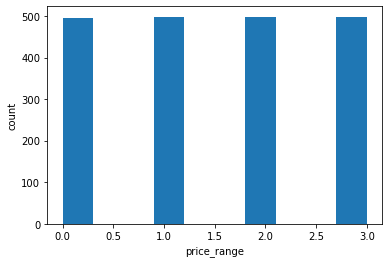

In [33]:
plt.hist(y)
plt.xlabel('price_range')
plt.ylabel('count');

Data is balanced

## 7- Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer

In [35]:
min_max_scaler = MinMaxScaler()
scaled_x_min_max = min_max_scaler.fit_transform(x_train)
scaled_x_test_min_max = min_max_scaler.transform(x_test)


In [36]:
model3.fit(scaled_x_min_max, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [37]:
model3.score(scaled_x_test_min_max, y_test)

0.9271356783919598

In [38]:
standard_scaler = StandardScaler()
scaled_x_standard = standard_scaler.fit_transform(x_train)
scaled_x_test_standard = standard_scaler.transform(x_test)

In [39]:
model3.fit(scaled_x_standard, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [40]:
model3.score(scaled_x_test_standard, y_test)

0.9698492462311558

In [41]:
quantile = QuantileTransformer()
scaled_x_quantile = quantile.fit_transform(x_train)
scaled_x_test_quantile = quantile.transform(x_test)

In [42]:
model3.fit(scaled_x_quantile, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [43]:
model3.score(scaled_x_test_quantile, y_test)

0.9221105527638191

## 8- Train test

Done in previous lines

## 9- PCA

In [44]:
from sklearn.decomposition import PCA

In [45]:
def print_pca_report(POV, y_pred):
    print(classification_report(y_test_new, y_pred))
    print('----------------------------------------------------------')
    print(confusion_matrix(y_test_new, y_pred))
    print('\n', 'Classification report for PCA with {} POV'.format(POV))

In [46]:
pca = PCA(0.75)
x_75 = pca.fit_transform(x)
pca.n_components_

2

In [47]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_75, y, test_size=0.2, random_state=21)


In [48]:
logistic = LogisticRegression()
logistic.fit(x_train_new, y_train_new)

LogisticRegression()

In [49]:
y_pred_75 = logistic.predict(x_test_new)
print_pca_report(pca.n_components, y_pred_75)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       111
           1       0.71      0.79      0.75        95
           2       0.70      0.72      0.71        96
           3       0.88      0.81      0.84        96

    accuracy                           0.80       398
   macro avg       0.80      0.80      0.80       398
weighted avg       0.81      0.80      0.80       398

----------------------------------------------------------
[[96 15  0  0]
 [ 8 75 12  0]
 [ 0 16 69 11]
 [ 0  0 18 78]]

 Classification report for PCA with 0.75 POV


In [50]:
pca = PCA(0.8)
x_80 = pca.fit_transform(x)
pca.n_components_

2

In [51]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_80, y, test_size=0.2, random_state=21)

In [52]:
logistic.fit(x_train_new, y_train_new)
y_pred_80 = logistic.predict(x_test_new)
print_pca_report(pca.n_components, y_pred_80)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       111
           1       0.71      0.79      0.75        95
           2       0.70      0.72      0.71        96
           3       0.88      0.81      0.84        96

    accuracy                           0.80       398
   macro avg       0.80      0.80      0.80       398
weighted avg       0.81      0.80      0.80       398

----------------------------------------------------------
[[96 15  0  0]
 [ 8 75 12  0]
 [ 0 16 69 11]
 [ 0  0 18 78]]

 Classification report for PCA with 0.8 POV


In [53]:
pca = PCA(0.9)
x_90 = pca.fit_transform(x)
pca.n_components_

3

In [54]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_90, y, test_size=0.2, random_state=21)

In [55]:
logistic.fit(x_train_new, y_train_new)
y_pred_90 = logistic.predict(x_test_new)
print_pca_report(pca.n_components, y_pred_90)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       111
           1       0.93      0.99      0.96        95
           2       0.92      0.93      0.92        96
           3       0.97      0.93      0.95        96

    accuracy                           0.95       398
   macro avg       0.95      0.95      0.95       398
weighted avg       0.96      0.95      0.95       398

----------------------------------------------------------
[[108   3   0   0]
 [  0  94   1   0]
 [  0   4  89   3]
 [  0   0   7  89]]

 Classification report for PCA with 0.9 POV


In [56]:
pca = PCA(0.95)
x_95 = pca.fit_transform(x)
pca.n_components_

4

In [57]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_95, y, test_size=0.2, random_state=21)

In [58]:
logistic.fit(x_train_new, y_train_new)
y_pred_95 = logistic.predict(x_test_new)
print_pca_report(pca.n_components, y_pred_95)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       111
           1       0.93      1.00      0.96        95
           2       0.94      0.93      0.93        96
           3       0.97      0.94      0.95        96

    accuracy                           0.96       398
   macro avg       0.96      0.96      0.96       398
weighted avg       0.96      0.96      0.96       398

----------------------------------------------------------
[[108   3   0   0]
 [  0  95   0   0]
 [  0   4  89   3]
 [  0   0   6  90]]

 Classification report for PCA with 0.95 POV


In [59]:
pca = PCA(0.99)
x_99 = pca.fit_transform(x)
pca.n_components_

4

In [60]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_99, y, test_size=0.2, random_state=21)

In [61]:
logistic.fit(x_train_new, y_train_new)
y_pred_99 = logistic.predict(x_test_new)
print_pca_report(pca.n_components, y_pred_99)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       111
           1       0.93      1.00      0.96        95
           2       0.94      0.93      0.93        96
           3       0.97      0.94      0.95        96

    accuracy                           0.96       398
   macro avg       0.96      0.96      0.96       398
weighted avg       0.96      0.96      0.96       398

----------------------------------------------------------
[[108   3   0   0]
 [  0  95   0   0]
 [  0   4  89   3]
 [  0   0   6  90]]

 Classification report for PCA with 0.99 POV


Bigger POV -> Better accuracy, Slower (because it has more features)


## 10- Data imbalance

In [62]:
y.replace([1, 2, 3], 4, inplace=True)     
y  

0       4
1       4
2       4
3       4
4       4
       ..
1995    0
1996    4
1997    4
1998    0
1999    4
Name: price_range, Length: 1988, dtype: int64

In [63]:
y.unique()

array([4, 0], dtype=int64)

Text(0, 0.5, 'count')

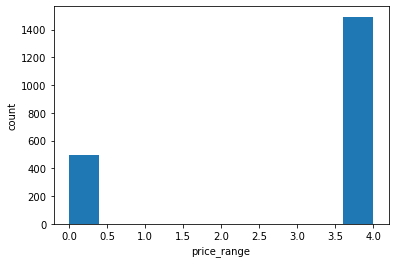

In [64]:
plt.hist(y)
plt.xlabel('price_range')
plt.ylabel('count')

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1590, 20) (398, 20) (1590,) (398,)


In [66]:
model3.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [67]:
def print_report_imbalanced(y_pred):
    print(classification_report(y_test, y_pred))
    print('----------------------------------------------------------')
    print(confusion_matrix(y_test, y_pred))

In [68]:
print_report_imbalanced(model3.predict(x_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       113
           4       1.00      1.00      1.00       285

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

----------------------------------------------------------
[[113   0]
 [  1 284]]


The accuracy is close to 1!

In [69]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,4
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,4
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,4
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,4
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,4
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,4
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [70]:
class_0 = df[df['price_range'] == 0]
class_4 = df[df['price_range'] == 4]
class_4

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,4
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,4
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,4
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,4
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,1467,1,0.5,0,0,0,18,0.6,122,5,0,888,1099,3962,15,11,5,1,1,1,4
1994,858,0,2.2,0,1,0,50,0.1,84,1,2,528,1416,3978,17,16,3,1,1,0,4
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,4
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,4


In [71]:
val_counts = df['price_range'].value_counts()
val_counts

4    1492
0     496
Name: price_range, dtype: int64

Now we use upsampling

In [72]:
new_class_0 = class_0.sample(val_counts[4], replace=True)
balanced_data = pd.concat([new_class_0, class_4], axis=0)
balanced_data['price_range'].value_counts()

0    1492
4    1492
Name: price_range, dtype: int64

Text(0, 0.5, 'count')

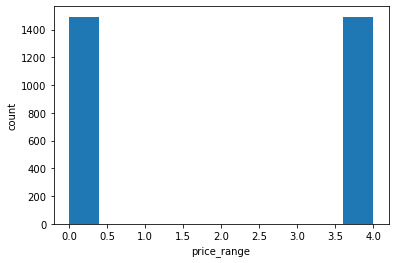

In [73]:
plt.hist(balanced_data['price_range'])
plt.xlabel('price_range')
plt.ylabel('count')

In [74]:
x = balanced_data.drop(['price_range'], axis=1)
y = balanced_data['price_range']

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

In [76]:
model3.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [77]:
def print_report_balanced(y_pred):
    print(classification_report(y_test, y_pred))
    print('----------------------------------------------------------')
    print(confusion_matrix(y_test, y_pred))

In [78]:
print_report_balanced(model3.predict(x_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       303
           4       1.00      1.00      1.00       294

    accuracy                           1.00       597
   macro avg       1.00      1.00      1.00       597
weighted avg       1.00      1.00      1.00       597

----------------------------------------------------------
[[303   0]
 [  1 293]]
